In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import mplcyberpunk

from matplotlib.patches import Patch

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"].isna())]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


Champions' winrates

In [4]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

,champion,win rate,matches,image
1,LeeSin,0.59,113.0,/home/bambito9/Esports-Data-Analysis/API Reque...
10,Vi,0.57,69.0,/home/bambito9/Esports-Data-Analysis/API Reque...
12,Gragas,0.59,59.0,/home/bambito9/Esports-Data-Analysis/API Reque...
3,Elise,0.62,56.0,/home/bambito9/Esports-Data-Analysis/API Reque...
11,Sylas,0.54,54.0,/home/bambito9/Esports-Data-Analysis/API Reque...
2,Nidalee,0.52,54.0,/home/bambito9/Esports-Data-Analysis/API Reque...
8,Maokai,0.67,52.0,/home/bambito9/Esports-Data-Analysis/API Reque...
4,MonkeyKing,0.58,52.0,/home/bambito9/Esports-Data-Analysis/API Reque...
9,Kindred,0.54,50.0,/home/bambito9/Esports-Data-Analysis/API Reque...
22,Viego,0.57,44.0,/home/bambito9/Esports-Data-Analysis/API Reque...


In [8]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 847 matches in which the jungler died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 23724 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 28.009445100354192 deaths per game


In [11]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [12]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

377

In [13]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 20 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 33 matches
anonymous 30 played 34 matches
anonymous 31 played 22 matches
anonymous 32 played 27 matches
anonymous 34 played 29 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 21 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 19 matches
anonymous 50 played 18 matches
anonymous 51 played 9 matches


In [14]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 377 matches in which the jungler died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 10273 times on the blue side


In [16]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [17]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

489

In [18]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 40 matches
anonymous 26 played 44 matches
anonymous 27 played 17 matches
anonymous 28 played 12 matches
anonymous 29 played 35 matches
anonymous 30 played 31 matches
anonymous 31 played 42 matches
anonymous 32 played 37 matches
anonymous 34 played 31 matches
anonymous 35 played 18 matches
anonymous 36 played 25 matches
anonymous 37 played 20 matches
anonymous 41 played 17 matches
anonymous 43 played 15 matches
anonymous 46 played 11 matches
anonymous 48 played 23 matches
anonymous 49 played 30 matches
anonymous 50 played 9 matches
anonymous 51 played 7 matches


In [19]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 489 matches in which the jungler died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 13451 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungler Players' Locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungler Players' Locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

function that returns a radar plot with champion's deaths in each cluster:

In [27]:
def radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors):

    radar_df = champs_deaths_df_0.merge(champs_deaths_df_1, how="outer")
    radar_df = radar_df.merge(champs_deaths_df_2, how="outer")
    radar_df = pd.pivot_table(radar_df, index='cluster', columns='champion', values='deaths', aggfunc='sum', fill_value=0)

    radar_list = radar_df.values.tolist()
    radar_labels = radar_df.keys()
    radar_labels = radar_labels.tolist()

    cluster_0 = [*radar_list[0], radar_list[0][0]]
    cluster_1 = [*radar_list[1], radar_list[1][0]]
    cluster_2 = [*radar_list[2], radar_list[2][0]]
    champs = [*radar_labels, radar_labels[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(champs))

    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

        ax.plot(label_loc, cluster_0, lw=2, color = cluster_colors[0])
        ax.plot(label_loc, cluster_1, lw=2, color = cluster_colors[1])
        ax.plot(label_loc, cluster_2, lw=2, color = cluster_colors[2])

        ax.fill(label_loc, cluster_0, alpha=0.3, color = cluster_colors[0])
        ax.fill(label_loc, cluster_1, alpha=0.3, color = cluster_colors[1])
        ax.fill(label_loc, cluster_2, alpha=0.3, color = "gold")

        lines, labels = plt.thetagrids(np.degrees(label_loc), labels=champs)

        ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

        ax.spines['polar'].set_linewidth(3)
        
        edge_color = (1, 1, 1, 0.2) 
        ax.spines['polar'].set_color(edge_color) 
        
        ax.grid(color='white', alpha=0.3)
        
        ax.set_ylim(0, 60)
        
        # Create custom legend handles
        cluster_0_legend = Patch(facecolor=cluster_colors[0], alpha=0.5, label='Cluster 0')
        cluster_1_legend = Patch(facecolor=cluster_colors[1], alpha=0.5, label='Cluster 1')
        cluster_2_legend = Patch(facecolor=cluster_colors[2], alpha=0.5, label='Cluster 2')
        
        # Add a legend with custom position and handles
        ax.legend(handles=[cluster_0_legend, cluster_1_legend, cluster_2_legend],
                bbox_to_anchor=(1.3, 0.2), fontsize=20, 
                frameon=True)


        plt.show()

---
### Clustering Red Team Victory

In [28]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6027,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6028,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,1.000400,6759.0,9676.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6029,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,2.000783,11252.0,6975.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6032,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,3.000950,7997.0,6232.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6034,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,4.001467,11488.0,7976.0,3.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [29]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [30]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [31]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

61.554192229038854

In [32]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

61.01405099992565

In [33]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 31.0625 deaths per game when winning on the red side

anonymous 25 won 16 matches on the red side
anonymous 25 has an average of 27.625 deaths per game when winning on the red side

anonymous 26 won 27 matches on the red side
anonymous 26 has an average of 28.88888888888889 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 29.25 deaths per game when winning on the red side

anonymous 28 won 7 matches on the red side
anonymous 28 has an average of 26.428571428571427 deaths per game when winning on the red side

anonymous 29 won 25 matches on the red side
anonymous 29 has an average of 28.24 deaths per game when winning on the red side

anonymous 30 won 21 matches on the red side
anonymous 30 has an average of 25.61904761904762 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average o

In [34]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 301 matches in which the jungler died at least once
20 players died a total of 8207 times on the red side
Victory games on red side contains an average of 27.26578073089701 deaths per game


In [35]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6027,14176.0,14506.0,0.000000
6028,6759.0,9676.0,1.000400
6029,11252.0,6975.0,2.000783
6032,7997.0,6232.0,3.000950
6034,11488.0,7976.0,4.001467
...,...,...,...
275770,10601.0,7668.0,20.005683
275772,4514.0,10154.0,21.005883
275773,9666.0,3361.0,22.006183
275776,1082.0,1188.0,23.006417


Time discretization

In [36]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=[-1, 0, 1])

In [37]:
np.unique(redSideVictory_df["timestamp"])

array([-1,  0,  1])

In [38]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [39]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [40]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6027,1.703054,1.824546,-1
6028,-0.409021,0.489305,-1
6029,0.870412,-0.257379,-1
6032,-0.056486,-0.462779,-1
6034,0.937616,0.019345,-1
...,...,...,...
275770,0.685032,-0.065801,0
275772,-1.048310,0.621447,0
275773,0.418780,-1.256460,0
275776,-2.025611,-1.857180,0


In [41]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2920375680653456


Silhouette score for k=3: 0.31684602604244927
Silhouette score for k=4: 0.38982482148303504
Silhouette score for k=5: 0.38391442642527474
Silhouette score for k=6: 0.3789287979107856
Silhouette score for k=7: 0.35238227877614564
Silhouette score for k=8: 0.34734351220527004
Silhouette score for k=9: 0.35754342889211616
Silhouette score for k=10: 0.3678995097971309
Silhouette score for k=11: 0.3754521876114797
Silhouette score for k=12: 0.38654371100777424
Silhouette score for k=13: 0.39228229894897493
Silhouette score for k=14: 0.39889184645582476
Silhouette score for k=15: 0.4015721447781252
Silhouette score for k=16: 0.39162156905110346
Silhouette score for k=17: 0.39667870992300525
Silhouette score for k=18: 0.3918894977334816
Silhouette score for k=19: 0.39219046374631483
Silhouette score for k=20: 0.39561102925443237
Silhouette score for k=25: 0.40798196936321623


K-Means with k = 4

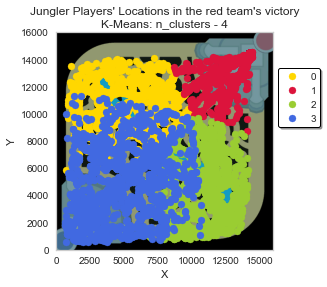

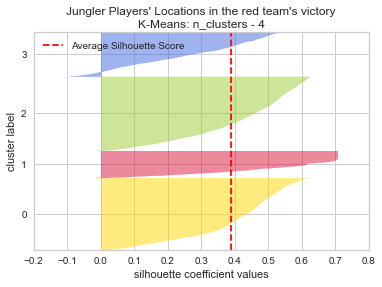

Silhouette score: 0.38982482148303504
2    2811
0    2724
3    1651
1    1021
Name: cluster, dtype: int64

Inertia: 7199.030266636411

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5843.657856,10292.658590,-0.659325
1,1,13002.705191,13143.558276,-0.560235
2,2,10609.663821,5353.758805,-0.680185
3,3,4991.943671,5074.827983,0.510600


In [42]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [43]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1942.457461,1612.211526,0.512635
1,1,1399.642438,1501.856434,0.665025
2,2,1569.290096,2009.948882,0.521841
3,3,2463.633589,2648.484939,0.508298


In [44]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10140.0,724.0,14089.0,5462.0,1,-1
1,1,14404.0,8699.0,14582.0,8763.0,1,-1
2,2,14110.0,5510.0,9727.0,797.0,1,-1
3,3,10667.0,656.0,11306.0,572.0,1,-1


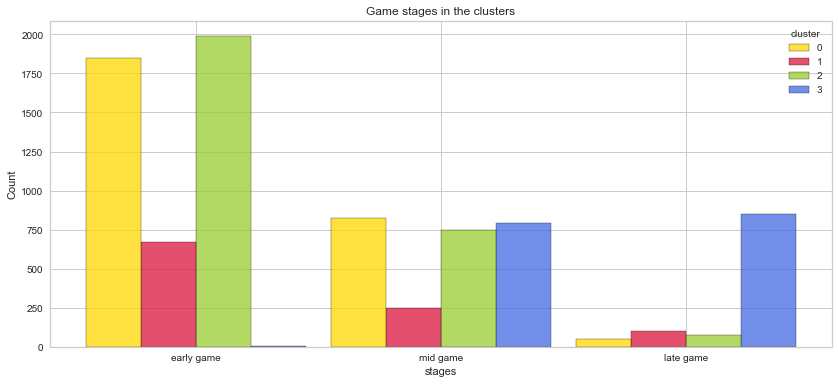

In [45]:
stagesPerClusterV2(redSideVictory_df, colors)

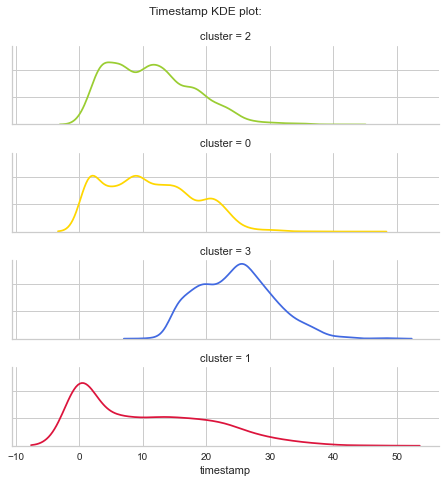

In [46]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [47]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,43
Gragas,22
Vi,22
MonkeyKing,21
Maokai,19
Viego,19
Sylas,18
Nidalee,17
Elise,15
Kindred,13


Deaths with each champion:

In [48]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         1117
Vi              629
Gragas          621
MonkeyKing      621
Viego           549
Maokai          525
Nidalee         447
Sylas           444
Elise           396
Kindred         335
Graves          328
JarvanIV        289
Sejuani         276
Lillia          272
Karthus         268
XinZhao         130
Amumu           108
Kayn             88
Khazix           84
Poppy            81
Trundle          69
AurelionSol      69
Taliyah          63
Talon            58
Rengar           54
Ivern            52
Evelynn          39
Nunu             36
RekSai           35
Qiyana           29
Jayce            27
Diana            25
Hecarim          22
Zed              21
Name: champion, dtype: int64

---
### Clustering Red Team Defeat

In [49]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275715,KR_6375903925,Red,anonymous 48,kr,Elise,30.009383,3384.0,11610.0,14.0,35.0,...,1840.0,1319.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275717,KR_6375903925,Red,anonymous 48,kr,Elise,31.009567,9090.0,8635.0,15.0,35.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275719,KR_6375903925,Red,anonymous 48,kr,Elise,32.009900,5828.0,8825.0,16.0,42.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275721,KR_6375903925,Red,anonymous 48,kr,Elise,33.010283,6544.0,14078.0,16.0,42.0,...,2099.0,1736.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [50]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [51]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

38.98594900007434

In [52]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 9 matches on the red side
anonymous 24 has an average of 29.0 deaths per game when losing on the red side

anonymous 25 lost 24 matches on the red side
anonymous 25 has an average of 27.375 deaths per game when losing on the red side

anonymous 26 lost 17 matches on the red side
anonymous 26 has an average of 25.88235294117647 deaths per game when losing on the red side

anonymous 27 lost 9 matches on the red side
anonymous 27 has an average of 24.77777777777778 deaths per game when losing on the red side

anonymous 28 lost 5 matches on the red side
anonymous 28 has an average of 31.6 deaths per game when losing on the red side

anonymous 29 lost 10 matches on the red side
anonymous 29 has an average of 25.3 deaths per game when losing on the red side

anonymous 30 lost 10 matches on the red side
anonymous 30 has an average of 31.6 deaths per game when losing on the red side

anonymous 31 lost 16 matches on the red side
anonymous 31 has an average of 28.75 deaths per 

In [53]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 188 matches in which the jungler died at least once
20 players died a total of 5244 times on the red side
Defeat games on red side contains an average of 27.893617021276597 deaths per game


In [54]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5904,14176.0,14506.0,0.000000
5905,8193.0,10180.0,1.000067
5906,10360.0,7867.0,2.000383
5909,11796.0,7451.0,3.000767
5910,1263.0,11706.0,4.001050
...,...,...,...
275715,3384.0,11610.0,30.009383
275717,9090.0,8635.0,31.009567
275719,5828.0,8825.0,32.009900
275721,6544.0,14078.0,33.010283


Time discretization

In [55]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=[-1, 0, 1])

In [56]:
np.unique(redSideDefeat_df["timestamp"])

array([-1,  0,  1])

In [57]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [58]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [59]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
5904,1.571888,1.660574,-1
5905,-0.271736,0.364576,-1
5906,0.396011,-0.328360,-1
5909,0.838506,-0.452987,-1
5910,-2.407172,0.821740,-1
...,...,...,...
275715,-1.753599,0.792980,1
275717,0.004669,-0.098280,1
275719,-1.000496,-0.041359,1
275721,-0.779865,1.532352,1


In [60]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29886638054366504


Silhouette score for k=3: 0.38077160813157096
Silhouette score for k=4: 0.3677815018839873
Silhouette score for k=5: 0.34612727020935985
Silhouette score for k=6: 0.34240828885029184
Silhouette score for k=7: 0.32834962350894803
Silhouette score for k=8: 0.33381030620503815
Silhouette score for k=9: 0.351875214851952
Silhouette score for k=10: 0.3616304366221802
Silhouette score for k=11: 0.363000597441628
Silhouette score for k=12: 0.36836254143613817
Silhouette score for k=13: 0.36976455657976426
Silhouette score for k=14: 0.3729148767897357
Silhouette score for k=15: 0.3780014176695606
Silhouette score for k=16: 0.38364443227862954
Silhouette score for k=17: 0.38414573426082155
Silhouette score for k=18: 0.392130425643539
Silhouette score for k=19: 0.4005314488538153
Silhouette score for k=20: 0.4067862111720817
Silhouette score for k=25: 0.4062239443649353


K-Means with k = 3

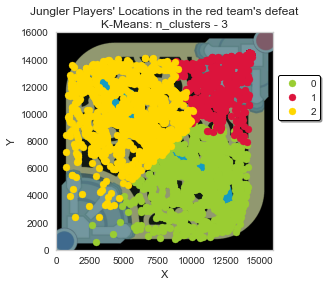

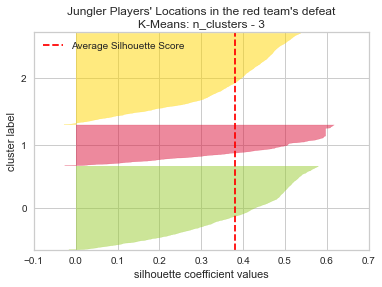

Silhouette score: 0.38077160813157096
2    2218
0    2035
1     991
Name: cluster, dtype: int64

Inertia: 6006.118205873355

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10559.593120,5706.495823,-0.515479
1,1,12739.145308,12771.995964,-0.186680
2,2,6075.402164,10249.096032,-0.379170


In [61]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [62]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1778.163411,2018.197658,0.653196
1,1,1474.569780,1634.320317,0.796349
2,2,2002.192516,1883.169300,0.723843


In [63]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14107.0,2688.0,9845.0,558.0,1,-1
1,1,14404.0,8320.0,14510.0,7924.0,1,-1
2,2,10061.0,752.0,14105.0,2380.0,1,-1


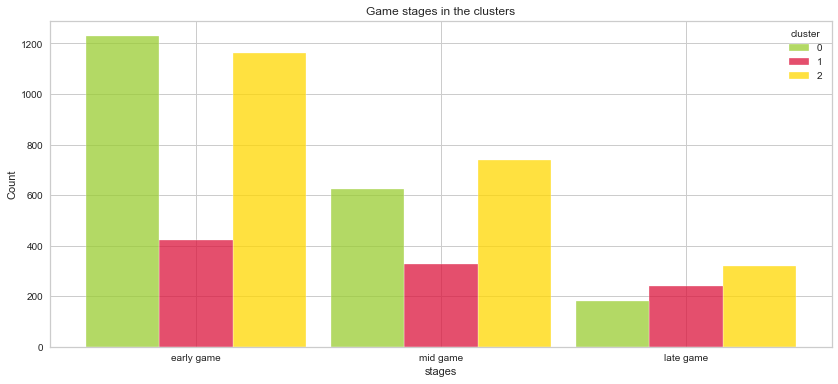

In [64]:
stagesPerClusterV2(redSideDefeat_df, colors)

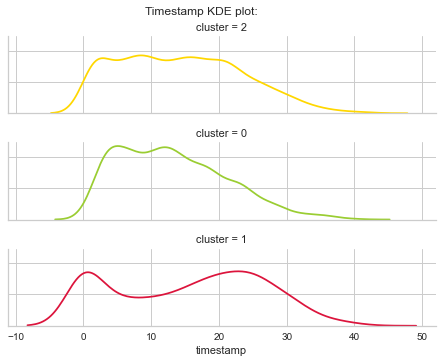

In [65]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [66]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,24
Vi,18
Sylas,15
Nidalee,13
Kindred,12
Viego,12
Gragas,9
Elise,9
MonkeyKing,9
Maokai,6


---
### Clustering Blue Team Victory

In [67]:
blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275337,NA1_4584631779,Blue,anonymous 37,na1,Gragas,12.002833,10156.0,6798.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275339,NA1_4584631779,Blue,anonymous 37,na1,Gragas,13.003033,10872.0,4964.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275341,NA1_4584631779,Blue,anonymous 37,na1,Gragas,14.003233,11291.0,7501.0,9.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275344,NA1_4584631779,Blue,anonymous 37,na1,Gragas,15.003900,6460.0,7863.0,10.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [68]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [69]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [70]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

49.07161803713528

In [71]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

47.58103767156624

In [72]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 4 matches on the blue side
anonymous 24 has an average of 28.75 deaths per game when winning on the blue side

anonymous 25 won 10 matches on the blue side
anonymous 25 has an average of 29.2 deaths per game when winning on the blue side

anonymous 26 won 13 matches on the blue side
anonymous 26 has an average of 28.692307692307693 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 30.6 deaths per game when winning on the blue side

anonymous 28 won 7 matches on the blue side
anonymous 28 has an average of 28.285714285714285 deaths per game when winning on the blue side

anonymous 29 won 13 matches on the blue side
anonymous 29 has an average of 27.0 deaths per game when winning on the blue side

anonymous 30 won 20 matches on the blue side
anonymous 30 has an average of 24.8 deaths per game when winning on the blue side

anonymous 31 won 10 matches on the blue side
anonymous 31 has an average of 27

In [73]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 185 matches in which the jungler died at least once
20 players died a total of 4888 times on the blue side
Victory games on blue side contains an average of 26.42162162162162 deaths per game


In [74]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
6151,557.0,345.0,0.000000
6152,5281.0,9076.0,1.000117
6153,2682.0,8436.0,2.000583
6156,9684.0,2577.0,3.000883
6158,11260.0,4972.0,4.001017
...,...,...,...
275337,10156.0,6798.0,12.002833
275339,10872.0,4964.0,13.003033
275341,11291.0,7501.0,14.003233
275344,6460.0,7863.0,15.003900


Time discretization

In [75]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=[-1, 0, 1])

In [76]:
np.unique(blueSideVictory_df["timestamp"])

array([-1,  0,  1])

In [77]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [78]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [79]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6151,-1.746099,-1.801678,-1
6152,-0.439658,0.665477,-1
6153,-1.158422,0.484630,-1
6156,0.778009,-1.170972,-1
6158,1.213858,-0.494207,-1
...,...,...,...
275337,0.908543,0.021773,-1
275339,1.106555,-0.496468,-1
275341,1.222432,0.220423,-1
275344,-0.113601,0.322715,0


In [80]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29410740173194905


Silhouette score for k=3: 0.3173071678729598
Silhouette score for k=4: 0.3938439103529703
Silhouette score for k=5: 0.3828056090271596
Silhouette score for k=6: 0.3794746789221755
Silhouette score for k=7: 0.3585899747407712
Silhouette score for k=8: 0.36533890381520695
Silhouette score for k=9: 0.3565506448896501
Silhouette score for k=10: 0.3609694307207413
Silhouette score for k=11: 0.3677538922521385
Silhouette score for k=12: 0.37927650488203307
Silhouette score for k=13: 0.37878064068937595
Silhouette score for k=14: 0.39606237916380027
Silhouette score for k=15: 0.39122627573723046
Silhouette score for k=16: 0.38892613197425174
Silhouette score for k=17: 0.3976169914642337
Silhouette score for k=18: 0.4036204808455022
Silhouette score for k=19: 0.4019667480366132
Silhouette score for k=20: 0.3989165167845303
Silhouette score for k=25: 0.40625602128352745


K-Means with k = 4

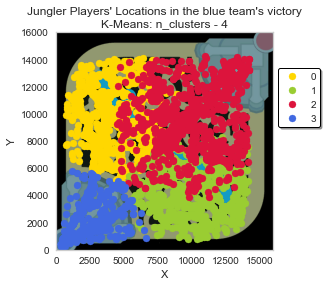

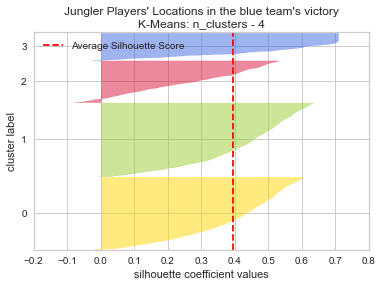

Silhouette score: 0.3938439103529703
1    1676
0    1649
2     946
3     617
Name: cluster, dtype: int64

Inertia: 4253.442046686828

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4368.576713,9207.335961,-0.621589
1,1,9379.497613,4433.874105,-0.740453
2,2,10016.255814,9734.673362,0.488372
3,3,1920.808752,1667.606159,-0.564019


In [81]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "royalblue"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [82]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1591.245339,1967.426747,0.556058
1,1,2039.113910,1577.971617,0.469917
2,2,2502.528447,2530.650513,0.512396
3,3,1554.794693,1447.489690,0.668486


In [83]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9316.0,724.0,14110.0,4991.0,1,-1
1,1,14122.0,5021.0,9258.0,785.0,1,-1
2,2,14238.0,4529.0,14234.0,3864.0,1,-1
3,3,6595.0,335.0,5808.0,269.0,1,-1


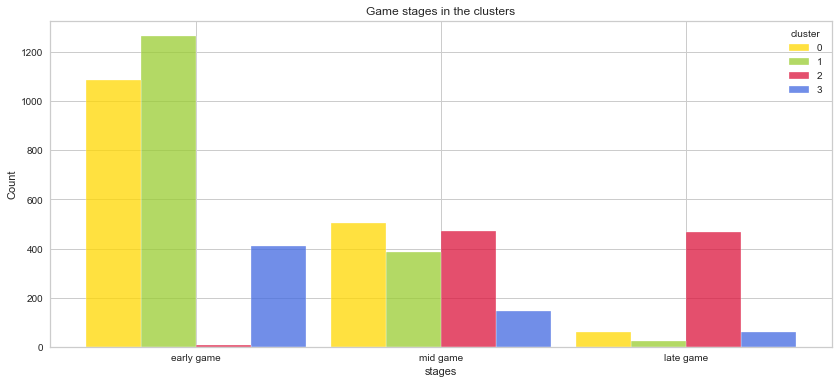

In [84]:
stagesPerClusterV2(blueSideVictory_df, colors)

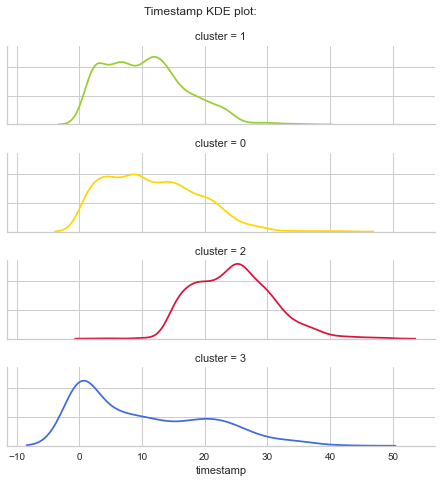

In [85]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [86]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,24
Elise,20
Vi,17
Maokai,16
Kindred,14
Gragas,13
Nidalee,11
Sylas,11
JarvanIV,10
MonkeyKing,9


---
### Clustering Blue Team Defeat

In [87]:
blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6466,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6467,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,1.000083,5170.0,8539.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6468,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,2.000300,2603.0,8236.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6471,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.000350,6579.0,3050.0,3.0,0.0,...,0.0,24.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6473,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,4.000467,5093.0,9429.0,3.0,0.0,...,0.0,40.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [88]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [89]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

52.41896232843376

In [90]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 10 matches on the blue side
anonymous 24 has an average of 25.8 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 30.6 deaths per game when losing on the blue side

anonymous 26 lost 18 matches on the blue side
anonymous 26 has an average of 26.77777777777778 deaths per game when losing on the blue side

anonymous 27 lost 10 matches on the blue side
anonymous 27 has an average of 27.0 deaths per game when losing on the blue side

anonymous 28 lost 1 matches on the blue side
anonymous 28 has an average of 38.0 deaths per game when losing on the blue side

anonymous 29 lost 20 matches on the blue side
anonymous 29 has an average of 30.2 deaths per game when losing on the blue side

anonymous 30 lost 14 matches on the blue side
anonymous 30 has an average of 28.0 deaths per game when losing on the blue side

anonymous 31 lost 12 matches on the blue side
anonymous 31 has an average of 28.0 deaths per

In [91]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 192 matches in which the jungler died at least once
20 players died a total of 5385 times on the blue side
Defeat games on blue side contains an average of 28.046875 deaths per game


In [92]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
6466,557.0,345.0,0.000000
6467,5170.0,8539.0,1.000083
6468,2603.0,8236.0,2.000300
6471,6579.0,3050.0,3.000350
6473,5093.0,9429.0,4.000467
...,...,...,...
275394,2980.0,11546.0,26.009117
275396,3041.0,8132.0,27.009233
275397,7145.0,4977.0,28.009250
275400,2580.0,10011.0,29.009800


Time discretization

In [93]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=[-1, 0, 1])

In [94]:
np.unique(blueSideDefeat_df["timestamp"])

array([-1,  0,  1])

In [95]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [96]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [97]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
6466,-1.576985,-1.679879,-1
6467,-0.178852,0.833634,-1
6468,-0.956872,0.740689,-1
6471,0.248196,-0.850119,-1
6473,-0.202189,1.106642,-1
...,...,...,...
275394,-0.842609,1.756033,1
275396,-0.824121,0.708787,1
275397,0.419742,-0.259011,1
275400,-0.963843,1.285171,1


In [98]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3007059920160977


Silhouette score for k=3: 0.38399948223986374
Silhouette score for k=4: 0.3637260188379195
Silhouette score for k=5: 0.34443992998129247
Silhouette score for k=6: 0.3405892661058832
Silhouette score for k=7: 0.33552799642968956
Silhouette score for k=8: 0.3301053703565738
Silhouette score for k=9: 0.33975202606589056
Silhouette score for k=10: 0.34144973599964445
Silhouette score for k=11: 0.35163200535644684
Silhouette score for k=12: 0.3481071200064075
Silhouette score for k=13: 0.35188123349899525
Silhouette score for k=14: 0.36156418146046576
Silhouette score for k=15: 0.3692227883357457
Silhouette score for k=16: 0.36713913900823614
Silhouette score for k=17: 0.3775325474664993
Silhouette score for k=18: 0.38540665397140234
Silhouette score for k=19: 0.39018667535969154
Silhouette score for k=20: 0.3958593958578311
Silhouette score for k=25: 0.3987992188332638


K-Means with k = 3

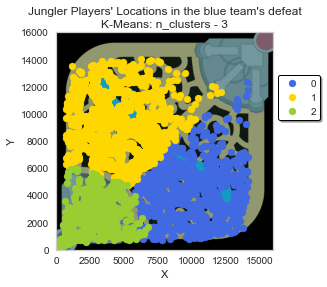

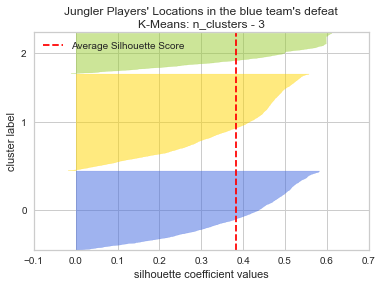

Silhouette score: 0.38399948223986374
1    2410
0    1968
2    1007
Name: cluster, dtype: int64

Inertia: 6119.650154056088

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9162.263211,4264.776423,-0.523882
1,1,4504.617427,8707.422822,-0.357261
2,2,2115.878848,1956.412115,-0.198610


In [99]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [100]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2061.175905,1725.560497,0.664457
1,1,1796.225536,1948.566363,0.718285
2,2,1586.179629,1522.424790,0.809746


In [101]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14128.0,4890.0,12362.0,748.0,1,-1
1,1,12114.0,713.0,14026.0,4757.0,1,-1
2,2,6747.0,186.0,5979.0,205.0,1,-1


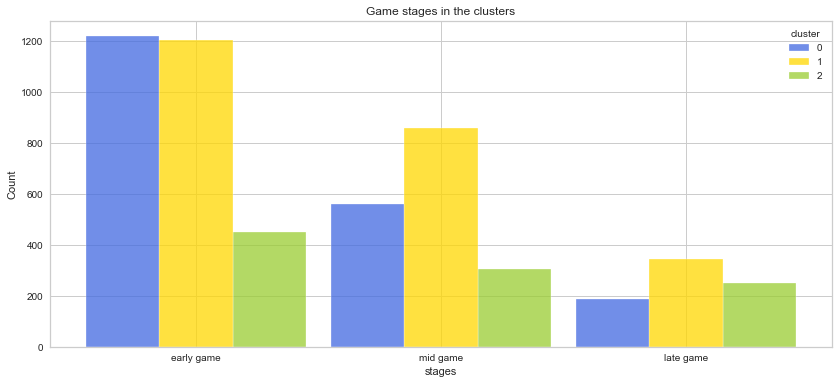

In [102]:
stagesPerClusterV2(blueSideDefeat_df, colors)

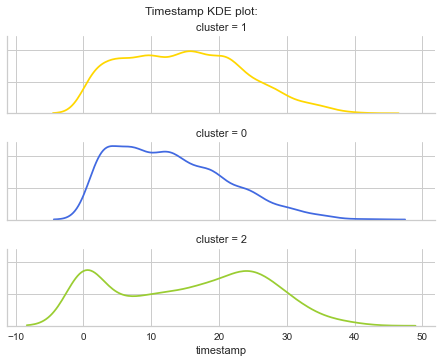

In [103]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [104]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,22
Graves,16
Gragas,15
Nidalee,13
MonkeyKing,13
Vi,12
Elise,12
Maokai,11
Kindred,11
Sylas,10


---

### Blue Win Rate vs Red Win Rate

In [105]:
wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6027,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6028,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,1.000400,6759.0,9676.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6029,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,2.000783,11252.0,6975.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6032,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,3.000950,7997.0,6232.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6034,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,4.001467,11488.0,7976.0,3.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [106]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

NameError: name 'champs_deaths_df_0' is not defined

In [ ]:
wins = len(np.unique(wins_df["gameId"]))
wins

486

In [ ]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 61.934156378600825 vs Blue: 38.065843621399175


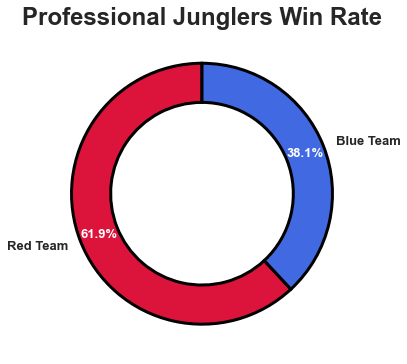

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Junglers Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [ ]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 62.67277586865215 vs Blue: 37.32722413134784
